In [225]:
#!/usr/bin/env python3

import os, umap
import numpy as np
import pandas as pd
import datatable as dt
import seaborn as sns
import matplotlib.pyplot as plt
import umap.plot
import csv

In [226]:
# Set path way
os.chdir('/GlobalNetworkMalaspinaHotmix/08_NetworkCluster')

In [227]:
# Read in data
Matrix = pd.read_csv('nw_comparison_graphlet_matrix.txt', sep="\t")
Meta = pd.read_csv('Sample_Classification.tsv', sep="\t")
Meta.layer

0      BAT
1      MES
2      DCM
3      EPI
4      SRF
      ... 
392    BAT
393    MES
394    MES
395    DCM
396    SRF
Name: layer, Length: 397, dtype: object

In [186]:
Matrix.columns

Index(['Hotmix_HM002_2000m', 'Hotmix_HM003_1000m', 'Hotmix_HM004_130m',
       'Hotmix_HM005_35m', 'Hotmix_HM006_3m', 'Hotmix_HM007_575m',
       'Hotmix_HM008_200m', 'Hotmix_HM010_25m', 'Hotmix_HM011_2000m',
       'Hotmix_HM012_1250m',
       ...
       'MalaVP_DNA_D78_430m', 'MalaVP_DNA_D80_88m', 'MalaVP_DNA_D862_3m',
       'MalaVP_DNA_D864_4000m', 'MalaVP_DNA_D866_3000m',
       'MalaVP_DNA_D868_1200m', 'MalaVP_DNA_D870_800m', 'MalaVP_DNA_D872_450m',
       'MalaVP_DNA_D874_86m', 'MalaVP_DNA_D999_3m'],
      dtype='object', length=397)

In [187]:
Meta.Sample

0         Hotmix_HM002_2000m
1         Hotmix_HM003_1000m
2          Hotmix_HM004_130m
3           Hotmix_HM005_35m
4            Hotmix_HM006_3m
               ...          
392    MalaVP_DNA_D868_1200m
393     MalaVP_DNA_D870_800m
394     MalaVP_DNA_D872_450m
395      MalaVP_DNA_D874_86m
396       MalaVP_DNA_D999_3m
Name: Sample, Length: 397, dtype: object

In [188]:
# Define UMAP
my_umap = umap.UMAP(random_state=123, n_neighbors=5, min_dist=.1, metric='precomputed')
my_embedding = my_umap.fit_transform(Matrix)
print(my_embedding.shape)

/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1504: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


(397, 2)


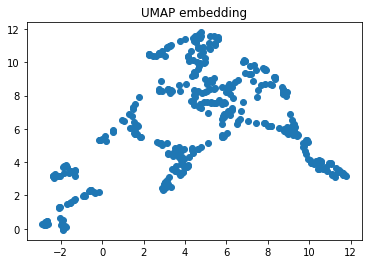

In [189]:
plt.scatter(my_embedding[:,0], my_embedding[:,1])
plt.title('UMAP embedding');

In [190]:
my_umap = umap.UMAP(random_state=123, n_neighbors=3, min_dist=.1, metric='precomputed')
mapper = my_umap.fit(Matrix)

/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1504: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


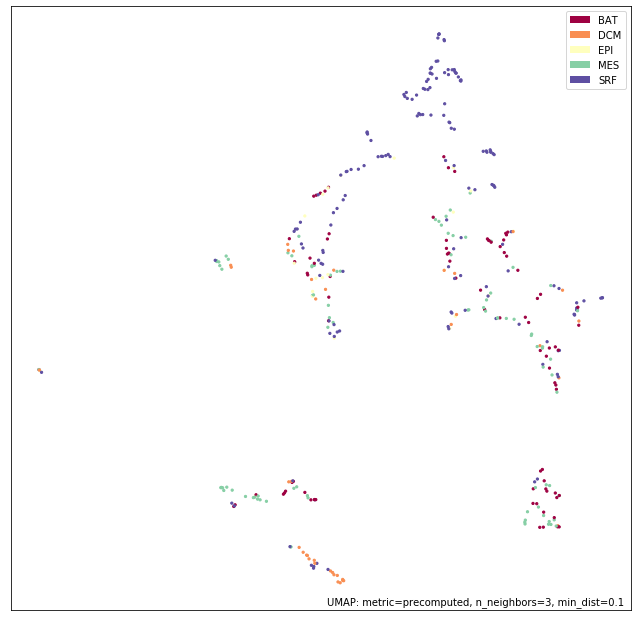

In [191]:
umap.plot.points(mapper, labels=Meta.layer)

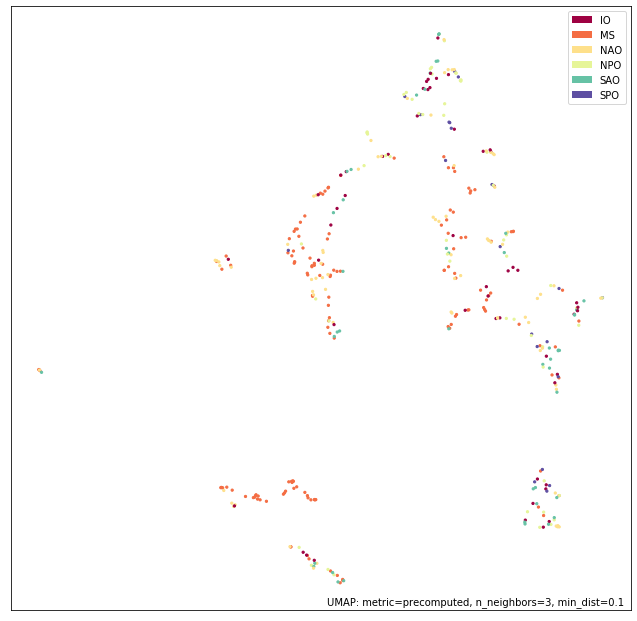

In [192]:
umap.plot.points(mapper, labels=Meta.OceanRegion)

In [193]:
mapper

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='precomputed',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=3, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=123, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


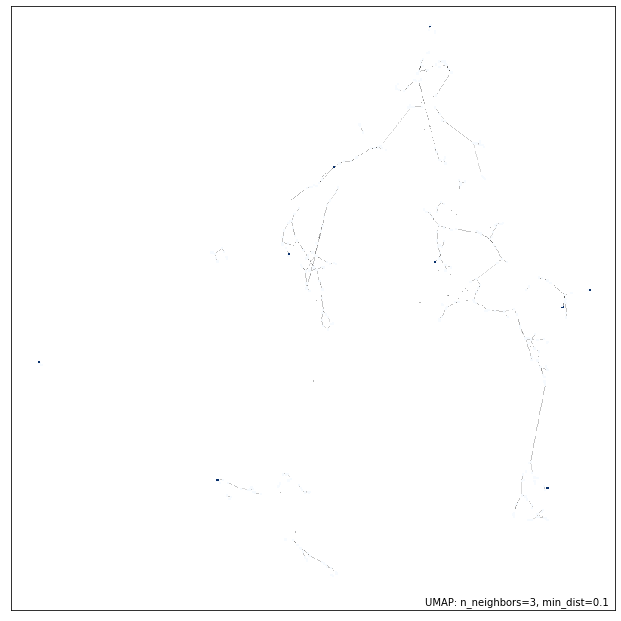

In [194]:
umap.plot.connectivity(mapper, show_points=True)

In [195]:
import hdbscan

In [196]:
hdbscan_labels = hdbscan.HDBSCAN(min_samples=3, min_cluster_size=3).fit_predict(Matrix)

In [197]:
hdbscan_labels

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

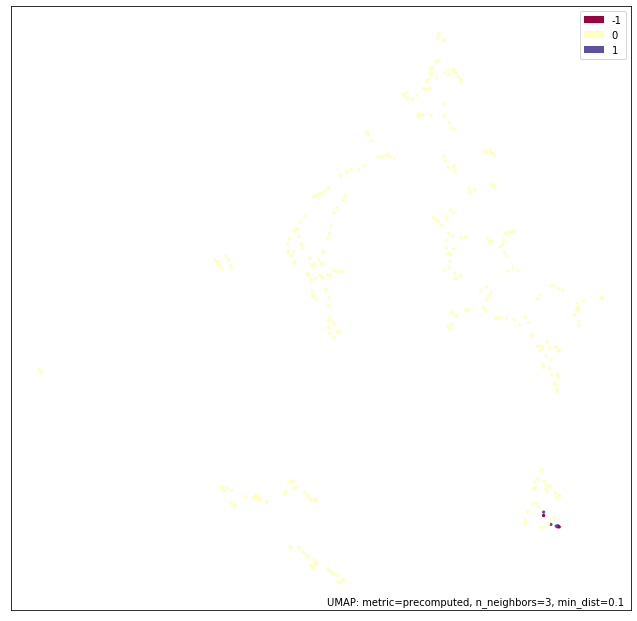

In [198]:
umap.plot.points(mapper, labels=hdbscan_labels)

In [199]:
clusterable_embedding = umap.UMAP(
    n_neighbors=3,
    min_dist=0.0,
    n_components=2,
    random_state=123,
    metric='precomputed',
).fit_transform(Matrix)

/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1504: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


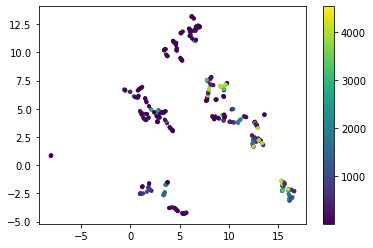

In [200]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=Meta.depth,
            cmap='viridis',
            s=10);
plt.colorbar();

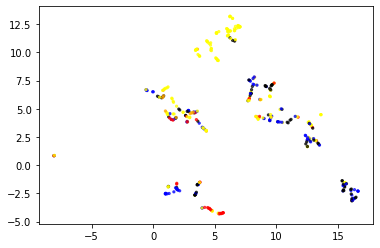

In [201]:
cdict = {'SRF': 'yellow', 'EPI': 'orange', 'DCM': 'red', 'MES': 'blue', 'BAT': 'black'}
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=Meta.layer.map(cdict),
            alpha=0.7,
            s=5);

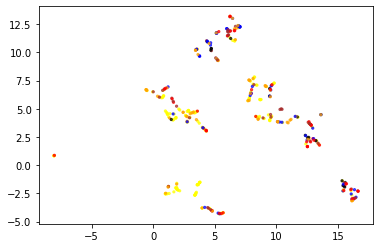

In [202]:
cdict = {'MS': 'yellow', 'NAO': 'orange', 'SAO': 'red', 'NPO': 'blue', 'SPO': 'black', 'IO': "brown"}
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=Meta.OceanRegion.map(cdict),
            alpha=0.7,
            s=5);

In [203]:
clusterable_embedding

array([[ 3.75344539e+00, -1.56257880e+00],
       [ 1.61304779e+01, -2.64863038e+00],
       [ 5.48932648e+00, -4.26844835e+00],
       [ 8.24019146e+00,  7.80165291e+00],
       [ 3.38116360e+00, -2.65823245e+00],
       [ 9.62761688e+00,  4.34632015e+00],
       [ 1.54113169e+01, -2.28780317e+00],
       [ 6.63848400e+00,  1.10780592e+01],
       [ 9.46368504e+00,  3.96112704e+00],
       [-8.04578114e+00,  8.45554829e-01],
       [ 4.14970016e+00,  3.20372963e+00],
       [ 1.32131481e+01,  2.17708564e+00],
       [ 4.57239866e+00, -3.82732534e+00],
       [ 6.86618209e-01,  5.97289133e+00],
       [ 4.02951002e+00,  3.32367682e+00],
       [ 3.32298183e+00,  4.63680029e+00],
       [ 5.58609200e+00, -4.25875139e+00],
       [ 7.80028868e+00,  5.91330004e+00],
       [ 1.15348339e+00,  4.61192417e+00],
       [ 9.47725296e+00,  3.95013094e+00],
       [ 1.47872508e+00,  4.06306124e+00],
       [ 3.76497602e+00, -1.54614151e+00],
       [ 3.47266221e+00,  4.71080017e+00],
       [ 1.

In [204]:
labels = hdbscan.HDBSCAN(
    min_samples=3,
    min_cluster_size=10,
).fit_predict(clusterable_embedding)
labels

array([ 1,  6,  3, 14,  1, 17,  5, 12, 17, -1, 10, 16,  4,  2, 10,  9,  3,
       14,  7, 17,  7,  1,  9, 16,  8, 14,  9,  1,  2, 16,  4,  9,  7,  9,
       12,  2, 17,  3,  0,  9, 17, 10,  7,  7, 17,  3, 17, 14,  7, 10,  9,
        7,  2,  5,  9, 17, -1, 16,  2,  7,  1,  1,  9,  0,  2,  7, -1,  4,
        9, 17,  1,  3,  7, 14,  0,  2,  1, -1,  0,  9, 10,  0,  1,  1, 15,
       17,  7,  0, 14, 17, -1, 14,  9, 14,  1, -1, 13,  9,  9,  1, 18, 10,
       13,  9,  0,  9, 12,  7,  1, -1,  9, 14,  0, 12,  9,  0, 14, 17, 14,
        0,  2,  1,  1,  0, 14,  7,  1,  0,  0,  1,  7,  1,  4,  0,  6, 14,
       17, 17,  0,  2,  0, 13, 13, -1, 18,  2, 14, 13, 18, 16, -1,  9,  9,
        2, 14, 13, 18,  0, 10,  9,  9,  2,  9, 13, 18,  0,  9,  9,  9,  0,
       14, 14, 18,  2,  7,  9, 14,  2, 10, 13, 13, 14, 14, 14, 13, 13, 13,
       13, 14, 14, 13, 14, 16, -1,  9,  2,  2, 12,  2,  0, 13, 11, 11,  8,
       18, 12, 11, 15, 11, 15,  8, 12, 12, 12, 12, 12, 12,  5, 18, 12, 11,
       11, 12, -1, 12, 13

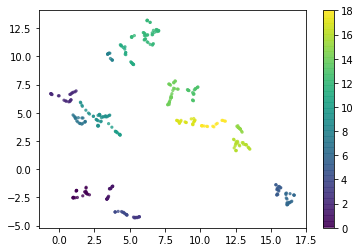

In [205]:
clustered = (labels >= 0)
plt.scatter(clusterable_embedding[clustered, 0], clusterable_embedding[clustered, 1],
            c=labels[clustered],
            alpha=0.7,
            s=5, cmap='viridis');
plt.colorbar();

In [206]:
labels.max()

18

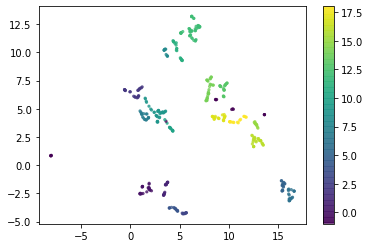

In [207]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=labels,
            alpha=0.7,
            s=5, cmap='viridis');
plt.colorbar();

In [208]:
Meta['cluster'] = labels

In [209]:
Meta['x'] = clusterable_embedding[:, 0]
Meta['y'] = clusterable_embedding[:, 1]

In [210]:
Meta_df = pd.DataFrame(Meta)

In [211]:
Meta_df.columns

Index(['Sample', 'depth', 'layer', 'OceanRegion', 'Latitude', 'Longitude',
       'OceanRegion_Layer', 'cluster', 'x', 'y'],
      dtype='object')

In [212]:
print(Meta)

                    Sample  depth layer OceanRegion  Latitude  Longitude  \
0       Hotmix_HM002_2000m   2000   BAT          MS    34.073     33.514   
1       Hotmix_HM003_1000m   1000   MES          MS    34.073     33.514   
2        Hotmix_HM004_130m    130   DCM          MS    34.073     33.514   
3         Hotmix_HM005_35m     35   EPI          MS    34.073     33.514   
4          Hotmix_HM006_3m      3   SRF          MS    34.073     33.514   
..                     ...    ...   ...         ...       ...        ...   
392  MalaVP_DNA_D868_1200m   1200   BAT          IO   -33.907     37.042   
393   MalaVP_DNA_D870_800m    800   MES          IO   -33.907     37.042   
394   MalaVP_DNA_D872_450m    450   MES          IO   -33.907     37.042   
395    MalaVP_DNA_D874_86m     86   DCM          IO   -33.907     37.042   
396     MalaVP_DNA_D999_3m      3   SRF          IO   -29.354     69.400   

    OceanRegion_Layer  cluster          x         y  
0              MS_BAT        1   

In [213]:
Meta.to_csv('/GlobalNetworkMalaspinaHotmix/08_NetworkCluster/test.csv') # doesn't work with the version I have, instead we will read line by line using a dictonary

TypeError: get_handle() got an unexpected keyword argument 'errors'

In [215]:
pd.__version__

'1.0.1'

In [217]:
my_dict = Meta.to_dict()
print(my_dict.keys())

dict_keys(['Sample', 'depth', 'layer', 'OceanRegion', 'Latitude', 'Longitude', 'OceanRegion_Layer', 'cluster', 'x', 'y'])


In [221]:
with open('myOutput.csv', 'w') as f:
    for key in my_dict.keys():
        f.write("%s,%s\n"%(key,my_dict[key]))

In [222]:
key="Sample"
my_dict[key]

{0: 'Hotmix_HM002_2000m',
 1: 'Hotmix_HM003_1000m',
 2: 'Hotmix_HM004_130m',
 3: 'Hotmix_HM005_35m',
 4: 'Hotmix_HM006_3m',
 5: 'Hotmix_HM007_575m',
 6: 'Hotmix_HM008_200m',
 7: 'Hotmix_HM010_25m',
 8: 'Hotmix_HM011_2000m',
 9: 'Hotmix_HM012_1250m',
 10: 'Hotmix_HM013_200m',
 11: 'Hotmix_HM014_750m',
 12: 'Hotmix_HM015_120m',
 13: 'Hotmix_HM018_2630m',
 14: 'Hotmix_HM019_2000m',
 15: 'Hotmix_HM020_1250m',
 16: 'Hotmix_HM021_118m',
 17: 'Hotmix_HM022_50m',
 18: 'Hotmix_HM023_3m',
 19: 'Hotmix_HM024_550m',
 20: 'Hotmix_HM025_200m',
 21: 'Hotmix_HM027_2000m',
 22: 'Hotmix_HM028_825m',
 23: 'Hotmix_HM029_100m',
 24: 'Hotmix_HM030_50m',
 25: 'Hotmix_HM031_3m',
 26: 'Hotmix_HM033_200m',
 27: 'Hotmix_HM034_2600m',
 28: 'Hotmix_HM035_2000m',
 29: 'Hotmix_HM036_1100m',
 30: 'Hotmix_HM037_90m',
 31: 'Hotmix_HM038_50m',
 32: 'Hotmix_HM039_3m',
 33: 'Hotmix_HM040_705m',
 34: 'Hotmix_HM042_2421m',
 35: 'Hotmix_HM043_2000m',
 36: 'Hotmix_HM044_1000m',
 37: 'Hotmix_HM045_110m',
 38: 'Hotmix_HM046_50m

In [224]:
with open("myOutput.tsv", 'w') as out_file:
    columns = list(my_dict.keys())
    out_file.write("\t".join(columns) + "\n")
    n_rows = len(my_dict[columns[0]])
    for i in range(0, n_rows):
        out_file.write("\t".join([str(my_dict[k][i]) for k in columns]) + "\n")

In [228]:
# First use umap to reduce dimensions from 397 down to 10 and then use hdbscan to detect clusters
clusterable_embedding = umap.UMAP(
    n_neighbors=3,
    min_dist=0.0,
    n_components=10,
    random_state=123,
    metric='precomputed',
).fit_transform(Matrix)

# another with 2 dimensions for visualization
clusterable_embedding2 = umap.UMAP(
    n_neighbors=3,
    min_dist=0.0,
    n_components=2,
    random_state=123,
    metric='precomputed',
).fit_transform(Matrix)

/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1504: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


In [231]:
clusterable_embedding

array([[ 3.6183193 ,  0.33891815,  5.2400503 , ...,  2.9098482 ,
         4.834172  ,  4.8585443 ],
       [14.628029  , -0.1976381 ,  4.852373  , ...,  5.2318707 ,
         4.122802  ,  5.543598  ],
       [ 3.869759  , -0.6188399 ,  4.0398016 , ...,  2.1916351 ,
         5.0338717 ,  4.080616  ],
       ...,
       [ 6.597215  ,  6.457063  ,  5.494713  , ...,  3.5300362 ,
         3.2458956 ,  4.981313  ],
       [ 3.417098  , -0.29958037,  4.48008   , ...,  2.5912404 ,
         5.4136353 ,  4.4660416 ],
       [ 7.76488   ,  6.4408135 , 10.147305  , ...,  3.946198  ,
         3.6079912 ,  5.1447716 ]], dtype=float32)

In [273]:
labels = hdbscan.HDBSCAN(
    min_samples=3,
    min_cluster_size=5,
).fit_predict(clusterable_embedding)
labels

array([ 1,  9,  7, 23,  2, 30,  6, 34, 30,  0, 12, 20,  8, 17, 12, 27,  7,
       24, 15, 30, 16,  1, 28, 20, 25, 23,  5,  1, 17, 21,  8,  5, 15, 28,
       34, 17, 30,  7,  3, 27, 30, 12, 16, 16, 30,  7, 30, 23, 15, -1,  5,
       16, 17,  6, 27, 30,  0, 21, 18, 15,  2,  2, 27, -1, 17, -1, 22, -1,
       27, 30,  1,  7, 15, 24,  3, 11,  1, 22,  3, 28, 12,  3,  2,  2, 19,
       30, 15,  3, 23, 30, 22, 24, 27, 23,  1, -1, 13, 27, 28,  2, 29, 12,
       13, 27,  3,  5, 34, 16,  1, 22, 28, 23,  4, 34, 28,  4, 24, 30, 24,
        4, 11,  1,  1,  3, 24, 16,  1,  4,  4,  2, 16,  2, -1,  4, 10, 23,
       30, 30,  3, -1,  4, 13, 13,  0, 30, 17, 23, 13, 30, 21,  0, 27, 28,
       11, 23, 13, 30,  4, -1,  5, 28, 11,  5, 13, -1,  4, 28, 27, 28,  4,
       23, 23, 30, 17, 16, 27, 24, 11, 12, 13, 13, 23, 24, 24, 13, 13, 13,
       13, 24, 24, 13, 24, 20, 29, -1, 18, 18, 33, 17,  4, 22, 26, 14, 25,
       30, 34, 26, 19, 14, 19, 25, 33, 31, 34, 34, 33, 35,  6, 29, 32, 26,
       26, 34, 19, 33, 22

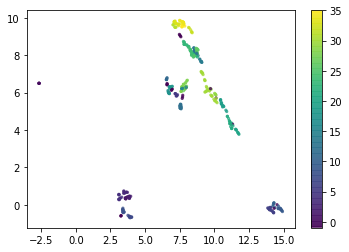

In [274]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=labels,
            alpha=0.7,
            s=5, cmap='viridis');
plt.colorbar();

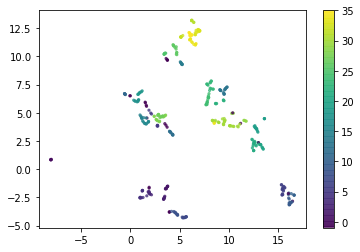

In [275]:
plt.scatter(clusterable_embedding2[:, 0], clusterable_embedding2[:, 1],
            c=labels,
            alpha=0.7,
            s=5, cmap='viridis');
plt.colorbar();

In [276]:
Meta['cluster'] = labels
Meta['x'] = clusterable_embedding2[:, 0]
Meta['y'] = clusterable_embedding2[:, 1]

my_dict = Meta.to_dict()
with open("HDBSCAN_minSamples3_minClusterSize5.tsv", 'w') as out_file:
    columns = list(my_dict.keys())
    out_file.write("\t".join(columns) + "\n")
    n_rows = len(my_dict[columns[0]])
    for i in range(0, n_rows):
        out_file.write("\t".join([str(my_dict[k][i]) for k in columns]) + "\n")


In [277]:
labels = hdbscan.HDBSCAN(
    min_samples=3,
    min_cluster_size=10,
).fit_predict(clusterable_embedding)
labels

array([ 1,  0,  5,  9,  1, 11,  0, 13, 11, -1,  3,  7,  6,  4,  3,  3,  5,
        9,  3, 11,  3,  1,  3,  7, 12,  9,  3,  1,  4,  7,  6,  3,  3,  3,
       13,  4, 11,  5,  2,  3, 11,  3,  3,  3, 11,  5, 11,  9,  3,  3,  3,
        3,  4,  0,  3, 11, -1,  7,  4,  3,  1,  1,  3,  4,  4,  3,  9, -1,
        3, 11,  1,  5,  3,  9,  2,  4,  1,  9,  2,  3,  3,  2,  1,  1, 10,
       11,  3,  2,  9, 11,  9,  9,  3,  9,  1,  3,  8,  3,  3,  1, 11,  3,
        8,  3,  2,  3, 13,  3,  1,  9,  3,  9,  2, 13,  3,  2,  9, 11,  9,
        2,  4,  1,  1,  2,  9,  3,  1,  2,  2,  1,  3,  1, -1,  2,  0,  9,
       11, 11,  2,  4,  2,  8,  8, -1, 11,  4,  9,  8, 11,  7, -1,  3,  3,
        4,  9,  8, 11,  2,  3,  3,  3,  4,  3,  8, 11,  2,  3,  3,  3,  2,
        9,  9, 11,  4,  3,  3,  9,  4,  3,  8,  8,  9,  9,  9,  8,  8,  8,
        8,  9,  9,  8,  9,  7, 11,  4,  4,  4, 14,  4,  2,  9, 12, -1, 12,
       11, 13, 12, 10, -1, 10, 12, 14, -1, 13, 13, 14, 13,  0, 11, -1, 12,
       12, 13, 10, 14,  9

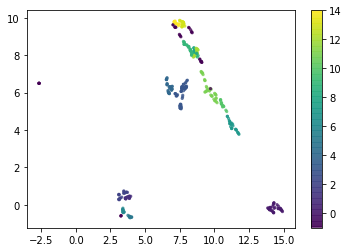

In [278]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=labels,
            alpha=0.7,
            s=5, cmap='viridis');
plt.colorbar();

[5, 6, 7, 8, 9]

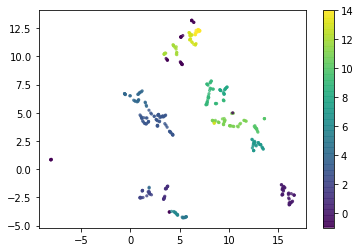

In [283]:
plt.scatter(clusterable_embedding2[:, 0], clusterable_embedding2[:, 1],
            c=labels,
            alpha=0.7,
            s=5, cmap='viridis');
plt.colorbar();

In [280]:
Meta['cluster'] = labels
Meta['x'] = clusterable_embedding2[:, 0]
Meta['y'] = clusterable_embedding2[:, 1]

my_dict = Meta.to_dict()
with open("HDBSCAN_minSamples3_minClusterSize10.tsv", 'w') as out_file:
    columns = list(my_dict.keys())
    out_file.write("\t".join(columns) + "\n")
    n_rows = len(my_dict[columns[0]])
    for i in range(0, n_rows):
        out_file.write("\t".join([str(my_dict[k][i]) for k in columns]) + "\n")

In [286]:
for x in list(range(5,11)):
    labels = hdbscan.HDBSCAN(
        min_samples=3,
        min_cluster_size=x,
    ).fit_predict(clusterable_embedding)

    Meta['cluster'] = labels
    Meta['x'] = clusterable_embedding2[:, 0]
    Meta['y'] = clusterable_embedding2[:, 1]

    my_dict = Meta.to_dict()
    with open('HDBSCAN_minSamples3_minClusterSize%s.tsv' % str(x), 'w') as out_file:
        columns = list(my_dict.keys())
        out_file.write("\t".join(columns) + "\n")
        n_rows = len(my_dict[columns[0]])
        for i in range(0, n_rows):
            out_file.write("\t".join([str(my_dict[k][i]) for k in columns]) + "\n")